In [51]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage.io import imread
from skimage.transform import pyramid_reduce, resize
print(tf.__version__)

2.3.0


In [52]:
model = tf.keras.models.load_model(r'LogoEraser/model/train_512')

In [122]:
input_img = '000000543.png'
test_img = imread(input_img)

test_img = resize(test_img, output_shape=(512, 512, 3), preserve_range=True)
test_img /= 255
x_data = np.empty((1, 512, 512, 3), dtype=np.float32)
x_data[0] = test_img

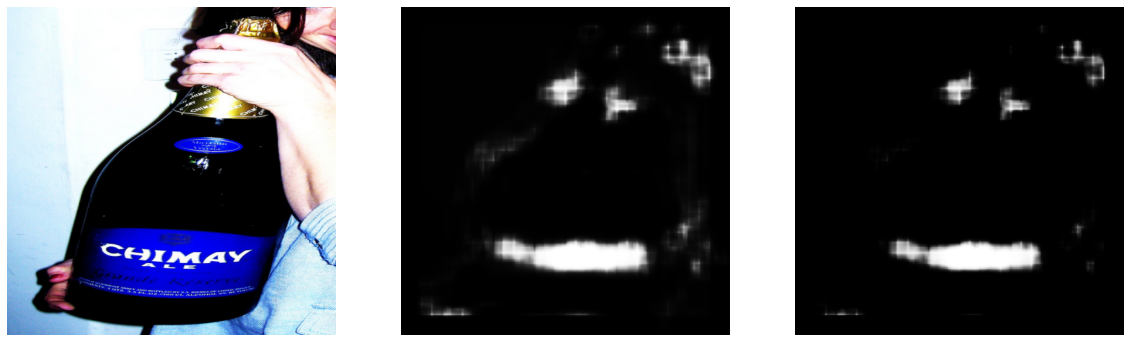

In [123]:
preds = model.predict(x_data)
prac_arr = preds[0].copy()
for i in range(512):
    for j in range(512):
        if prac_arr[i][j] < np.mean(prac_arr[0]):
            prac_arr[i][j] = 0
#             pass
        else:
            prac_arr[i][j] = (prac_arr[i][j])**2
            
fig, ax = plt.subplots(1,3, figsize = (20, 10))
ax[0].axis("off")
ax[1].axis("off")
ax[2].axis("off")
ax[0].imshow(x_data[0].squeeze(), cmap='gray')
ax[1].imshow(preds[0].squeeze(), cmap='gray')
ax[2].imshow(prac_arr.squeeze(), cmap='gray')

In [124]:
import cv2
import numpy as np
from PIL import Image


# img = cv2.imread('000001010.png', 0)
img = Image.fromarray(prac_arr.squeeze())

# # #1. Erosion
kernel = np.ones((3, 3), np.uint8)
result = cv2.erode(np.float32(img), kernel, iterations = 1)
img = result

#2. Dilation
# kernel = np.ones((5, 5), np.uint8)
# result = cv2.dilate(np.float32(img), kernel, iterations = 1)

#4.closing
kernel = np.ones((70, 70), np.uint8)
result = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

cv2.imshow("Source", img)
cv2.imshow("Result", result)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [125]:
import numpy as np
import cv2
import sys

def inpaint(img,mask):
    img_cp = img.copy()
    res = cv2.inpaint(src=img_cp, inpaintMask=mask,
                     inpaintRadius=3, flags=cv2.INPAINT_TELEA)
    return res



img = cv2.imread(input_img, cv2.IMREAD_COLOR)
# to_img = Image.fromarray(img, "RGB")
# img_res = cv2.resize(to_img, dsize=(512, 512), interpolation=cv2.INTER_AREA)
img_res = resize(img, output_shape=(512, 512, 3))
img_res *= 255
result *= 255
mask_img = np.array(result, dtype=np.uint8)
img_res = np.array(img_res, dtype=np.uint8)

res = inpaint(img_res, mask_img)
cv2.imshow("ddd", res)

cv2.waitKey(0)
cv2.destroyAllWindows()
